In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/content/drive/MyDrive/')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns

Mounted at /content/drive


In [ ]:
def calculate_power(df, d, alpha=0.05):
    """
    Args:
        df: DataFrame with columns min_pvalue_method1 and min_pvalue_method2
        d: dimension parameter for Bonferroni correction
        alpha: significance level (default 0.05)
    """
    # Bonferroni
    bonferroni_threshold = alpha / (d * (d - 1) / 2)
    power_method1 = (df['min_pvalue_method1'] < bonferroni_threshold).mean()
    power_method2 = (df['min_pvalue_method2'] < bonferroni_threshold).mean()
    return power_method1, power_method2

In [ ]:
d_values = [50, 100]#, 200]
ord_values = [0.1, 1, 10]
c_len_values = [1000]
n_values = [400, 800, 1600]
results = []
base_dir = "/content/drive/MyDrive/Power_1228/"
for d in d_values:
    for n in n_values:
        for c_len in c_len_values:
            for ord_val in ord_values:
                filename = base_dir + f"final_minpvalue_d{d}_n{n}_clen{c_len}_ord{ord_val}.csv"
                if not Path(filename).exists():
                    print(f"Skipping {filename} - file not found")
                    continue

                try:
                    df = pd.read_csv(filename)
                    power_method1, power_method2 = calculate_power(df, d)
                    results.append({
                        'd': d,
                        'n': n,
                        'clen': c_len,
                        'ord': ord_val,
                        'method': 'method1',
                        'power': power_method1
                    })
                    results.append({
                        'd': d,
                        'n': n,
                        'clen': c_len,
                        'ord': ord_val,
                        'method': 'method2',
                        'power': power_method2
                    })

                    print(f"Processed {filename}")

                except Exception as e:
                    print(f"Error processing {filename}: {str(e)}")
                    continue

d_values = [50, 100]
ord_values = [2, 4, 8, 20, 30]
c_len_values = [1000]
n_values = [400, 800, 1600]
base_dir = "/content/drive/MyDrive/Power2_0103/"
for d in d_values:
    for n in n_values:
        for c_len in c_len_values:
            for ord_val in ord_values:
                filename = base_dir + f"final_minpvalue_d{d}_n{n}_clen{c_len}_ord{ord_val}.csv"
                if not Path(filename).exists():
                    print(f"Skipping {filename} - file not found")
                    continue

                try:
                    df = pd.read_csv(filename)
                    power_method1, power_method2 = calculate_power(df, d)
                    results.append({
                        'd': d,
                        'n': n,
                        'clen': c_len,
                        'ord': ord_val,
                        'method': 'method1',
                        'power': power_method1
                    })
                    results.append({
                        'd': d,
                        'n': n,
                        'clen': c_len,
                        'ord': ord_val,
                        'method': 'method2',
                        'power': power_method2
                    })

                    print(f"Processed {filename}")

                except Exception as e:
                    print(f"Error processing {filename}: {str(e)}")
                    continue

results_df = pd.DataFrame(results)
output_filename = "power_analysis_results.csv"
results_df.to_csv(output_filename, index=False)
print(f"\nResults saved to {output_filename}")
print("\nSummary of results:")
print(results_df.pivot_table(
    values='power',
    index=['d', 'n', 'ord'],
    columns='method',
    aggfunc='first'
).round(3))

Processed /content/drive/MyDrive/Power_1228/final_minpvalue_d50_n400_clen1000_ord0.1.csv
Processed /content/drive/MyDrive/Power_1228/final_minpvalue_d50_n400_clen1000_ord1.csv
Processed /content/drive/MyDrive/Power_1228/final_minpvalue_d50_n400_clen1000_ord10.csv
Processed /content/drive/MyDrive/Power_1228/final_minpvalue_d50_n800_clen1000_ord0.1.csv
Processed /content/drive/MyDrive/Power_1228/final_minpvalue_d50_n800_clen1000_ord1.csv
Processed /content/drive/MyDrive/Power_1228/final_minpvalue_d50_n800_clen1000_ord10.csv
Processed /content/drive/MyDrive/Power_1228/final_minpvalue_d50_n1600_clen1000_ord0.1.csv
Processed /content/drive/MyDrive/Power_1228/final_minpvalue_d50_n1600_clen1000_ord1.csv
Processed /content/drive/MyDrive/Power_1228/final_minpvalue_d50_n1600_clen1000_ord10.csv
Processed /content/drive/MyDrive/Power_1228/final_minpvalue_d100_n400_clen1000_ord0.1.csv
Processed /content/drive/MyDrive/Power_1228/final_minpvalue_d100_n400_clen1000_ord1.csv
Processed /content/drive/My

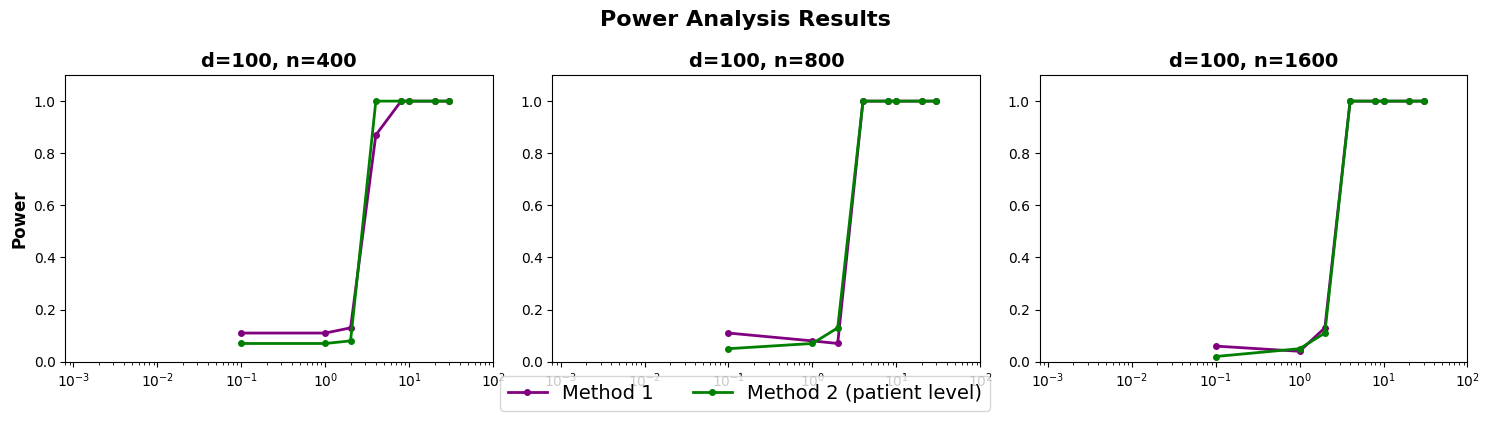

In [ ]:
TITLE_SIZE = 16
SUBTITLE_SIZE = 14
AXIS_LABEL_SIZE = 12
TICK_LABEL_SIZE = 10

df = pd.read_csv('power_analysis_results.csv')

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

fig.suptitle('Power Analysis Results', fontsize=TITLE_SIZE, y=0.98, weight='bold')

d_values = [100] #[50, 100]
n_values = [400, 800, 1600]

for i, d in enumerate(d_values):
    for j, n in enumerate(n_values):
        ax = axes[j]

        subset = df[(df['d'] == d) & (df['n'] == n)].sort_values(by='ord')

        if not subset.empty:
            subset_method1 = subset[subset['method'] == 'method1']
            subset_method2 = subset[subset['method'] == 'method2']

            ax.plot(subset_method1['ord'], subset_method1['power'], 'o-',
                   color='purple', label='Method 1', linewidth=2, markersize=4)
            ax.plot(subset_method2['ord'], subset_method2['power'], 'o-',
                   color='green', label='Method 2 (patient level)', linewidth=2, markersize=4)

            ax.set_xscale('log')
            ax.set_ylim(0, 1.1)
            ax.set_xlim(0.0008, 100)
            if i == 2:
                ax.set_xlabel('ord', fontsize=AXIS_LABEL_SIZE, weight='bold')
            if j == 0:
                ax.set_ylabel('Power', fontsize=AXIS_LABEL_SIZE, weight='bold')

            ax.set_title(f'd={d}, n={n}', fontsize=SUBTITLE_SIZE, weight='bold')

            ax.tick_params(axis='both', which='major', labelsize=TICK_LABEL_SIZE)
        else:
            ax.text(0.5, 0.5, 'No data available',
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=TICK_LABEL_SIZE)
            ax.set_xticks([])
            ax.set_yticks([])

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,
          loc='center',
          bbox_to_anchor=(0.5, 0.02),
          ncol=2,
          fontsize=SUBTITLE_SIZE,
          frameon=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

In [ ]:
d_values = [100]#[50, 100, 200]
ord_values = [1]
c_len_values = [1000]
n_values = [400, 800, 1600]
results = []
base_dir = "/content/drive/MyDrive/typeI_0103/"
alpha = 0.05
for d in d_values:
    for n in n_values:
        for c_len in c_len_values:
            for ord_val in ord_values:
                filename = base_dir + f"final_minpvalue_d{d}_n{n}_clen{c_len}.csv"
                if not Path(filename).exists():
                    print(f"Skipping {filename} - file not found")
                    continue

                try:
                    df = pd.read_csv(filename)
                    power_method1, power_method2 = calculate_power(df, d, alpha=alpha)
                    results.append({
                        'd': d,
                        'n': n,
                        'clen': c_len,
                        'ord': ord_val,
                        'method': 'method1',
                        'power': power_method1
                    })
                    results.append({
                        'd': d,
                        'n': n,
                        'clen': c_len,
                        'ord': ord_val,
                        'method': 'method2',
                        'power': power_method2
                    })

                    print(f"Processed {filename}")

                except Exception as e:
                    print(f"Error processing {filename}: {str(e)}")
                    continue

results_df = pd.DataFrame(results)
output_filename = "typeI_analysis_results.csv"
results_df.to_csv(output_filename, index=False)
print(f"\nResults saved to {output_filename}")
print("\nSummary of results:")
print(results_df.pivot_table(
    values='power',
    index=['d', 'n', 'ord'],
    columns='method',
    aggfunc='first'
).round(3))

Processed /content/drive/MyDrive/typeI_0103/final_minpvalue_d100_n400_clen1000.csv
Processed /content/drive/MyDrive/typeI_0103/final_minpvalue_d100_n800_clen1000.csv
Processed /content/drive/MyDrive/typeI_0103/final_minpvalue_d100_n1600_clen1000.csv

Results saved to typeI_analysis_results.csv

Summary of results:
method        method1  method2
d   n    ord                  
100 400  1       0.16     0.10
    800  1       0.09     0.08
    1600 1       0.06     0.09


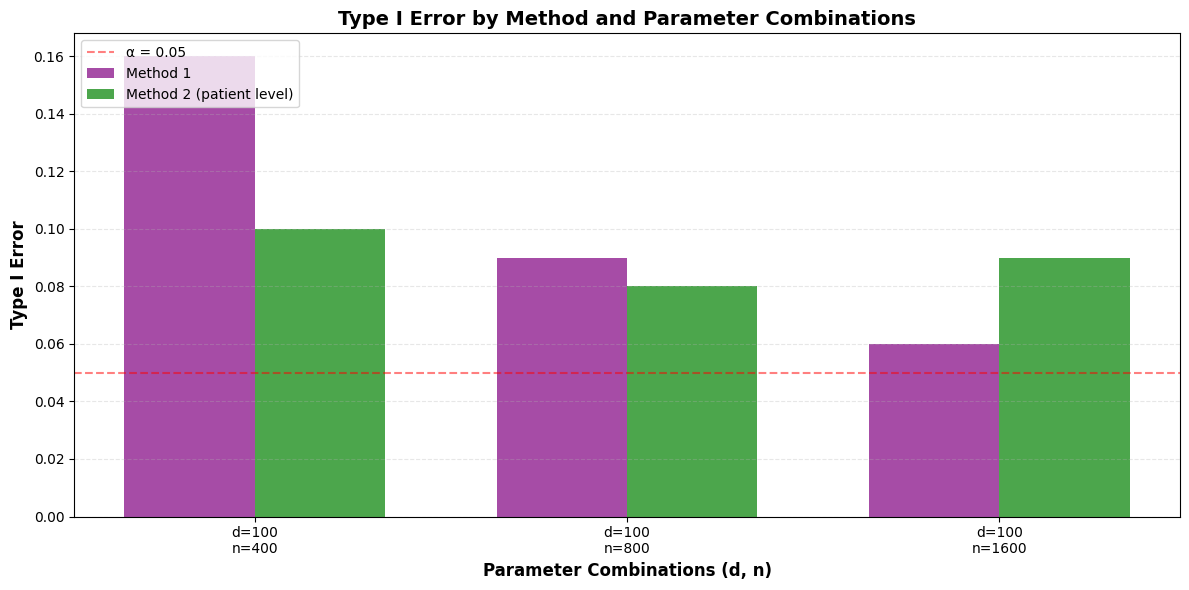

In [ ]:
df = pd.read_csv('typeI_analysis_results.csv')
df = df.pivot_table(
    values='power',
    index=['d', 'n', 'ord'],
    columns='method',
).reset_index()
df.sort_values(['d', 'n'])

plt.figure(figsize=(12, 6))
x = np.arange(len(df))
width = 0.35

plt.bar(x - width/2, df['method1'], width, label='Method 1', color='purple', alpha=0.7)
plt.bar(x + width/2, df['method2'], width, label='Method 2 (patient level)', color='green', alpha=0.7)
plt.axhline(y=0.05, color='red', linestyle='--', alpha=0.5, label=f'α = {alpha}')

labels = [f'd={row.d}\nn={row.n}' for row in df.itertuples()]
plt.xticks(x, labels, rotation=0)

plt.xlabel('Parameter Combinations (d, n)', fontsize=12, weight='bold')
plt.ylabel('Type I Error', fontsize=12, weight='bold')
plt.title('Type I Error by Method and Parameter Combinations', fontsize=14, weight='bold')

plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.legend(loc='upper left', frameon=True)
plt.tight_layout()

# Figure 4: FWER comparison and Power Analysis

In [ ]:
df_power = pd.read_csv("power_analysis_results.csv")
df_typeI = pd.read_csv("typeI_analysis_results.csv")

df_typeI_pivot = df_typeI.pivot_table(
    values='power',
    index=['d', 'n', 'ord'],
    columns='method'
).reset_index()

TITLE_SIZE = 16
SUBTITLE_SIZE = 14
AXIS_LABEL_SIZE = 12
TICK_LABEL_SIZE = 10

fig, axes = plt.subplots(1, 4, figsize=(24, 5))
ax_typeI = axes[0]

x = np.arange(len(df_typeI_pivot))
width = 0.35

ax_typeI.bar(x - width/2,
             df_typeI_pivot['method1'],
             width,
             label='Method 1 (only total co-occurrence)',
             color='purple',
             alpha=0.7)
ax_typeI.bar(x + width/2,
             df_typeI_pivot['method2'],
             width,
             label='Method 2 (patient level)',
             color='green',
             alpha=0.7)

ax_typeI.axhline(y=alpha, color='red', linestyle='--', alpha=0.6,
                 label=f'α = {alpha}')

# X-axis tick labels: (d, n)
labels = [f"n={int(row.n)}" for _, row in df_typeI_pivot.iterrows()]
ax_typeI.set_xticks(x)
ax_typeI.set_xticklabels(labels, rotation=0, fontsize=TICK_LABEL_SIZE)

ax_typeI.set_xlabel('Sample Size n',
                    fontsize=AXIS_LABEL_SIZE, weight='bold')
ax_typeI.set_ylabel('FWER',
                    fontsize=AXIS_LABEL_SIZE, weight='bold')
ax_typeI.set_title('FWER by Method',
                   fontsize=SUBTITLE_SIZE, weight='bold')
ax_typeI.set_ylim(0, 1)
ax_typeI.legend(loc='upper left', fontsize=TICK_LABEL_SIZE, frameon=True)

ax_typeI.grid(True, axis='y', linestyle='--', alpha=0.3)

d_values_plot = [100]
n_values_plot = [400, 800, 1600]

for j, n in enumerate(n_values_plot):
    ax = axes[j+1]
    d = d_values_plot[0]

    subset = df_power[(df_power['d'] == d) & (df_power['n'] == n)].copy()
    subset.sort_values(by='ord', inplace=True)

    if not subset.empty:
        subset_method1 = subset[subset['method'] == 'method1']
        subset_method2 = subset[subset['method'] == 'method2']

        ax.plot(subset_method1['ord'],
                subset_method1['power'],
                'o-',
                color='purple',
                label='Method 1',
                linewidth=2,
                markersize=4)
        ax.plot(subset_method2['ord'],
                subset_method2['power'],
                'o-',
                color='green',
                label='Method 2 (patient level)',
                linewidth=2,
                markersize=4)

        ax.set_xscale('log')
        ax.set_ylim(0, 1.1)
        ax.set_title(f'Power Analysis (n={n})',
                     fontsize=SUBTITLE_SIZE, weight='bold')
        ax.set_xlabel('scaling coefficient', fontsize=AXIS_LABEL_SIZE, weight='bold')
        if j == 0:
            ax.set_ylabel('Power', fontsize=AXIS_LABEL_SIZE, weight='bold')

        ax.tick_params(axis='both', which='major', labelsize=TICK_LABEL_SIZE)

        ax.grid(True, alpha=0.3, linestyle='--')
    else:
        ax.text(0.5, 0.5, 'No data available',
                ha='center', va='center', transform=ax.transAxes,
                fontsize=TICK_LABEL_SIZE)
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()

plt.savefig('combined_typeI_power_analysis.pdf', dpi=300, bbox_inches='tight')
plt.close()

# Figure 2 : Max-norm error between PMI estimators and the population PMI matrix

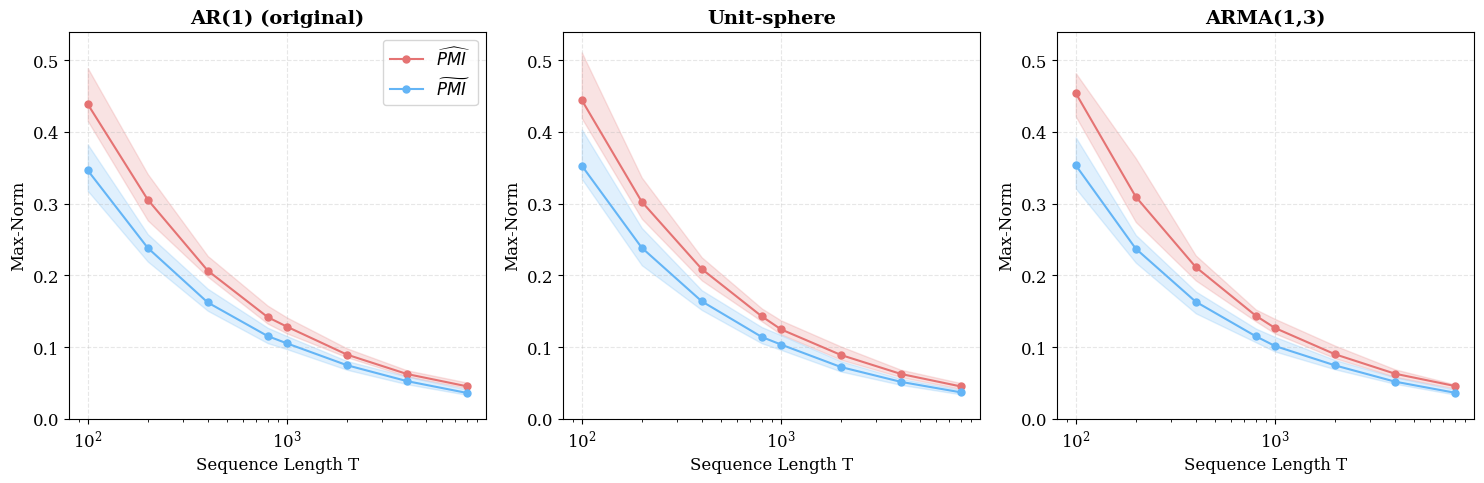

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/PMI_discourse_robust_plot_data0107_d100_ord0.5.csv')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

generators = data['Generator'].unique()
fig, axes = plt.subplots(1, len(generators), figsize=(15, 5))
fig.subplots_adjust(wspace=0.3)
colors = {
    '\\widehat{PMI}': '#E57373',  # Red
    '\\tilde{PMI}': '#64B5F6'     # Blue
}

for ax, generator in zip(axes, generators):
    generator_data = data[data['Generator'] == generator]

    for estimator in colors.keys():
        estimator_data = generator_data[generator_data['Estimator'] == estimator]

        ax.plot('Length', 'Median', data=estimator_data,
                color=colors[estimator], marker='o', markersize=5,
                label='$\\widehat{PMI}$' if estimator == '\\widehat{PMI}' else '$\\widetilde{PMI}$')

        ax.fill_between(estimator_data['Length'],
                       estimator_data['Lower'],
                       estimator_data['Upper'],
                       color=colors[estimator], alpha=0.2)

    ax.set_xscale('log')
    ax.set_ylim(0, 0.54)
    ax.set_xlabel('Sequence Length T')
    ax.set_ylabel('Max-Norm')
    ax.set_title(generator, fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')

    if generator == generators[0]:
        ax.legend()

plt.tight_layout()
plt.savefig('nfixed.pdf')
plt.show()

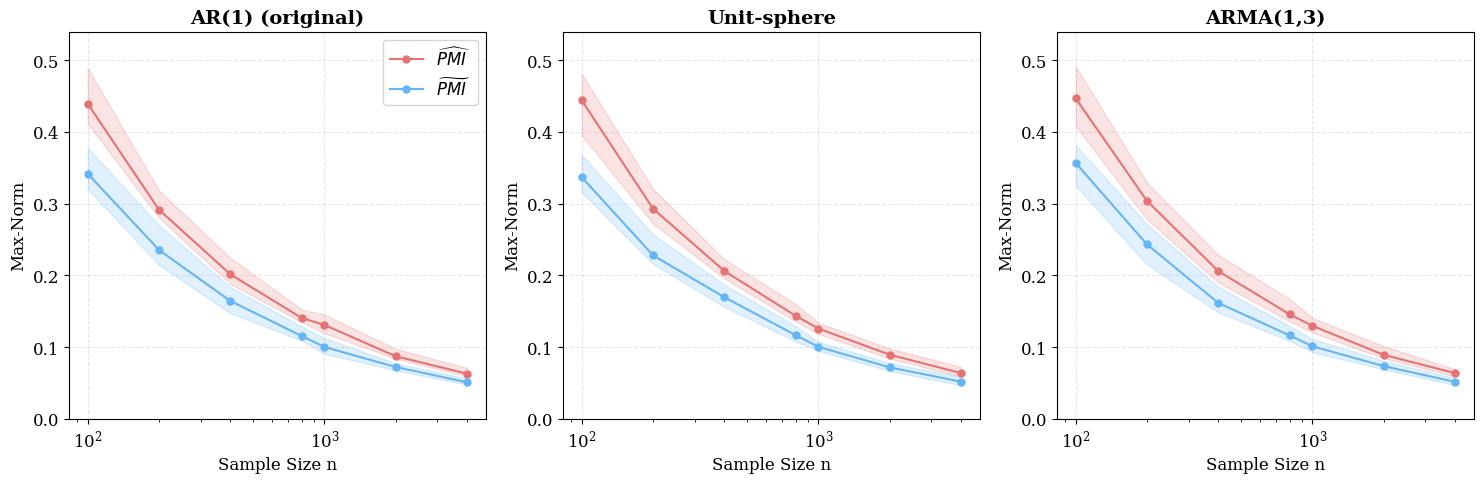

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/PMI_discourse_robust_plot_data_d100_ord0.5.csv')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

generators = data['Generator'].unique()
fig, axes = plt.subplots(1, len(generators), figsize=(15, 5))
fig.subplots_adjust(wspace=0.3)
colors = {
    '\\widehat{PMI}': '#E57373',
    '\\tilde{PMI}': '#64B5F6'
}

for ax, generator in zip(axes, generators):
    generator_data = data[data['Generator'] == generator]

    for estimator in colors.keys():
        estimator_data = generator_data[generator_data['Estimator'] == estimator]
        ax.plot('SampleSize', 'Median', data=estimator_data,
                color=colors[estimator], marker='o', markersize=5,
                label='$\\widehat{PMI}$' if estimator == '\\widehat{PMI}' else '$\\widetilde{PMI}$')

        ax.fill_between(estimator_data['SampleSize'],
                       estimator_data['Lower'],
                       estimator_data['Upper'],
                       color=colors[estimator], alpha=0.2)

    ax.set_xscale('log')
    ax.set_ylim(0, 0.54)
    ax.set_xlabel('Sample Size n')
    ax.set_ylabel('Max-Norm')
    ax.set_title(generator, fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')

    if generator == generators[0]:
        ax.legend()

plt.tight_layout()
plt.savefig('Tfixed.pdf')
plt.show()

# Figure 3: max-norm difference between the low-rank estimator and the population PMI matrix

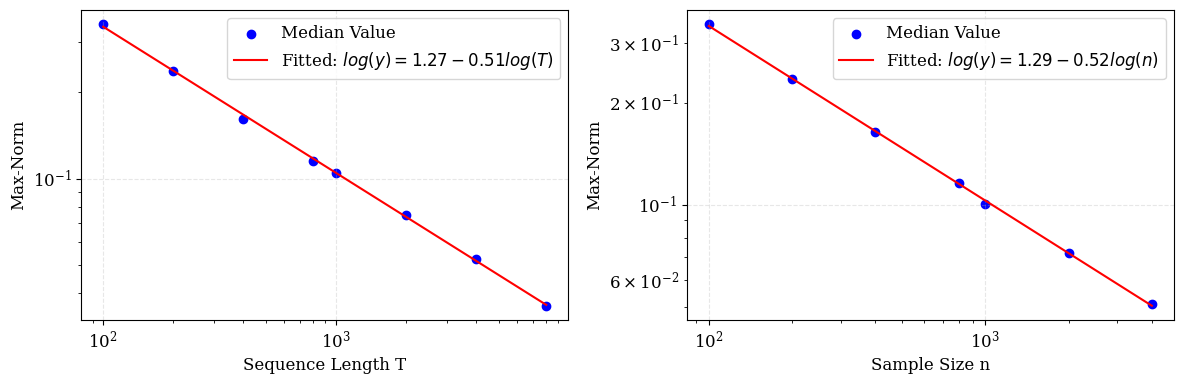

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

data1 = pd.read_csv('/content/PMI_discourse_robust_plot_data0107_d100_ord0.5.csv')

sub_data1 = data1[
    (data1['Estimator'] == '\\tilde{PMI}') &
    (data1['Generator'] == 'AR(1) (original)')
]

x_data1 = sub_data1['Length'].values
y_data1 = sub_data1['Median'].values
logx_data1 = np.log(x_data1)
logy_data1 = np.log(y_data1)

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(logx_data1, logy_data1)
a_fit1 = np.exp(intercept1)
b_fit1 = -slope1
x_fit1 = np.logspace(np.log10(min(x_data1)), np.log10(max(x_data1)), 100)
y_fit1 = a_fit1 / (x_fit1**b_fit1)

data2 = pd.read_csv('/content/PMI_discourse_robust_plot_data_d100_ord0.5.csv')

sub_data2 = data2[
    (data2['Estimator'] == '\\tilde{PMI}') &
    (data2['Generator'] == 'AR(1) (original)')
]

x_data2 = sub_data2['SampleSize'].values
y_data2 = sub_data2['Median'].values
logx_data2 = np.log(x_data2)
logy_data2 = np.log(y_data2)

slope2, intercept2, r_value2, p_value2, std_err2 = linregress(logx_data2, logy_data2)
a_fit2 = np.exp(intercept2)
b_fit2 = -slope2

x_fit2 = np.logspace(np.log10(min(x_data2)), np.log10(max(x_data2)), 100)
y_fit2 = a_fit2 / (x_fit2**b_fit2)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.scatter(x_data1, y_data1, label='Median Value', color='blue')
ax1.plot(x_fit1, y_fit1, label=rf'Fitted: $log(y) = {intercept1:.2f} {slope1:.2f} log(T)$', color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Sequence Length T')
ax1.set_ylabel('Max-Norm')
ax1.legend()
ax1.grid(True, alpha=0.3, linestyle='--')

ax2.scatter(x_data2, y_data2, label='Median Value', color='blue')
ax2.plot(x_fit2, y_fit2, label=rf'Fitted: $log(y) = {intercept2:.2f} {slope2:.2f} log(n)$', color='red')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Sample Size n')
ax2.set_ylabel('Max-Norm')
ax2.legend()
ax2.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('order_analysis.pdf')
plt.show()
